# 회귀나무 예제 (CAT 점수 데이터)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('copdcat.csv' ,header=0)
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]

### max_depth=2 트리

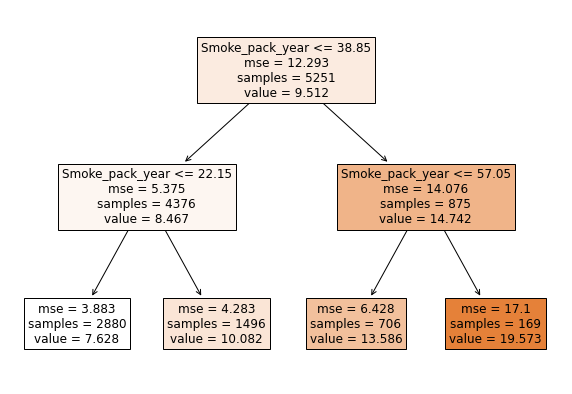

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
r_tree = DecisionTreeRegressor(max_depth=2,random_state=0) 
r_tree.fit(X, y)
plt.figure(figsize=(10,7))
plot_tree(r_tree, feature_names=X.columns, filled=True, fontsize=12) 
plt.show()

### min_samples_split=1000 트리

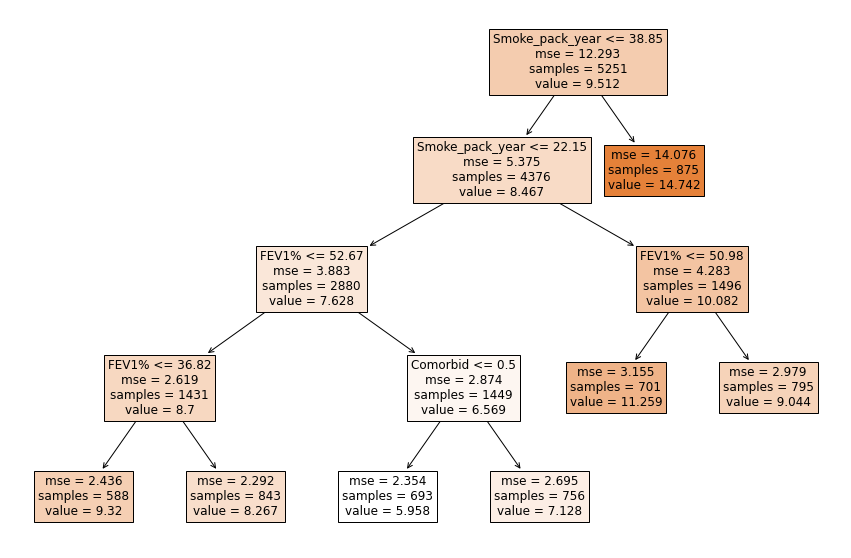

In [4]:
r_tree = DecisionTreeRegressor(min_samples_split=1000,random_state=0) 
r_tree.fit(X, y)
plt.figure(figsize=(15,10))
plot_tree(r_tree, feature_names=X.columns, filled=True, fontsize=12) 
plt.show()

### min_impurity_decrease=0.1 트리

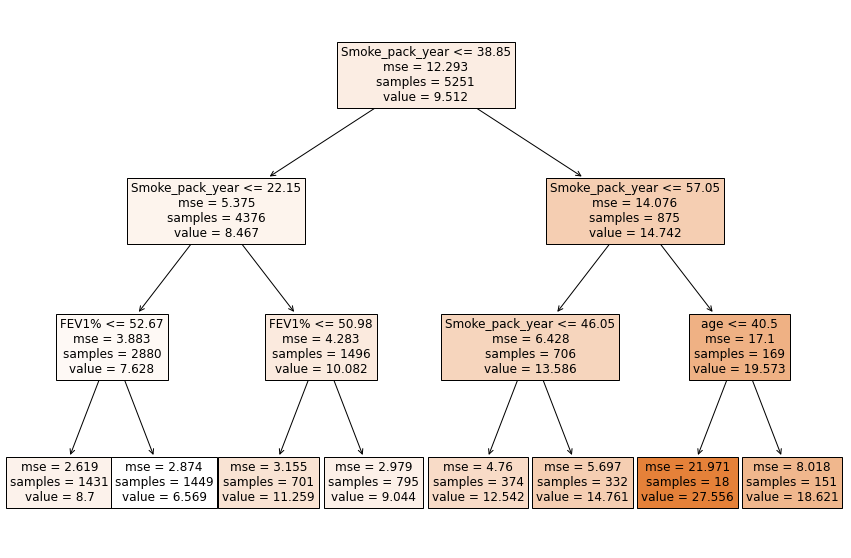

In [5]:
r_tree = DecisionTreeRegressor(min_impurity_decrease=0.1,random_state=0) 
r_tree.fit(X, y)
plt.figure(figsize=(15,10))
plot_tree(r_tree, feature_names=X.columns, filled=True, fontsize=12) 
plt.show()

### Alpha=0.1 트리

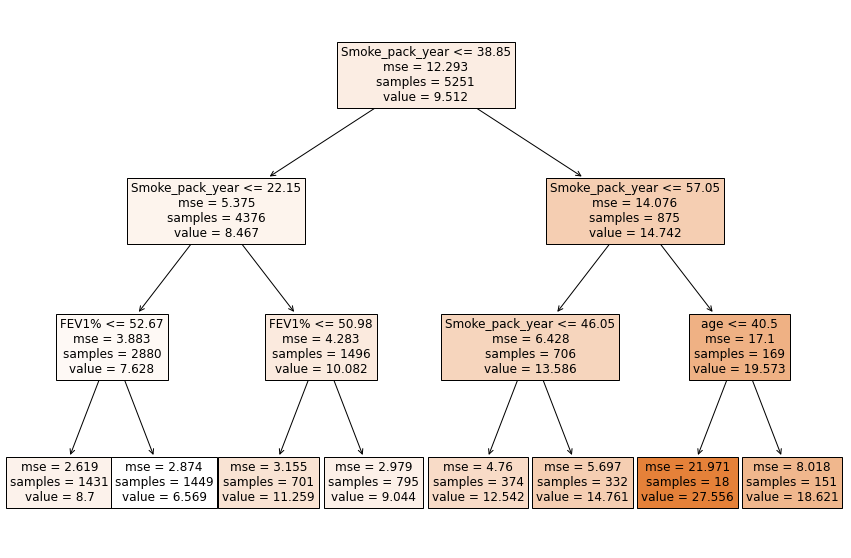

In [6]:
r_tree = DecisionTreeRegressor(ccp_alpha=0.1,random_state=0) 
r_tree.fit(X, y)
plt.figure(figsize=(15,10))
plot_tree(r_tree, feature_names=X.columns, filled=True, fontsize=12) 
plt.show()

### Pruning

In [7]:
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.00, 0.2, 0.01)}, cv=10)
g_cv.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])})

In [8]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.01}
score   : 0.809457430101077


### Alpha=0.01 트리

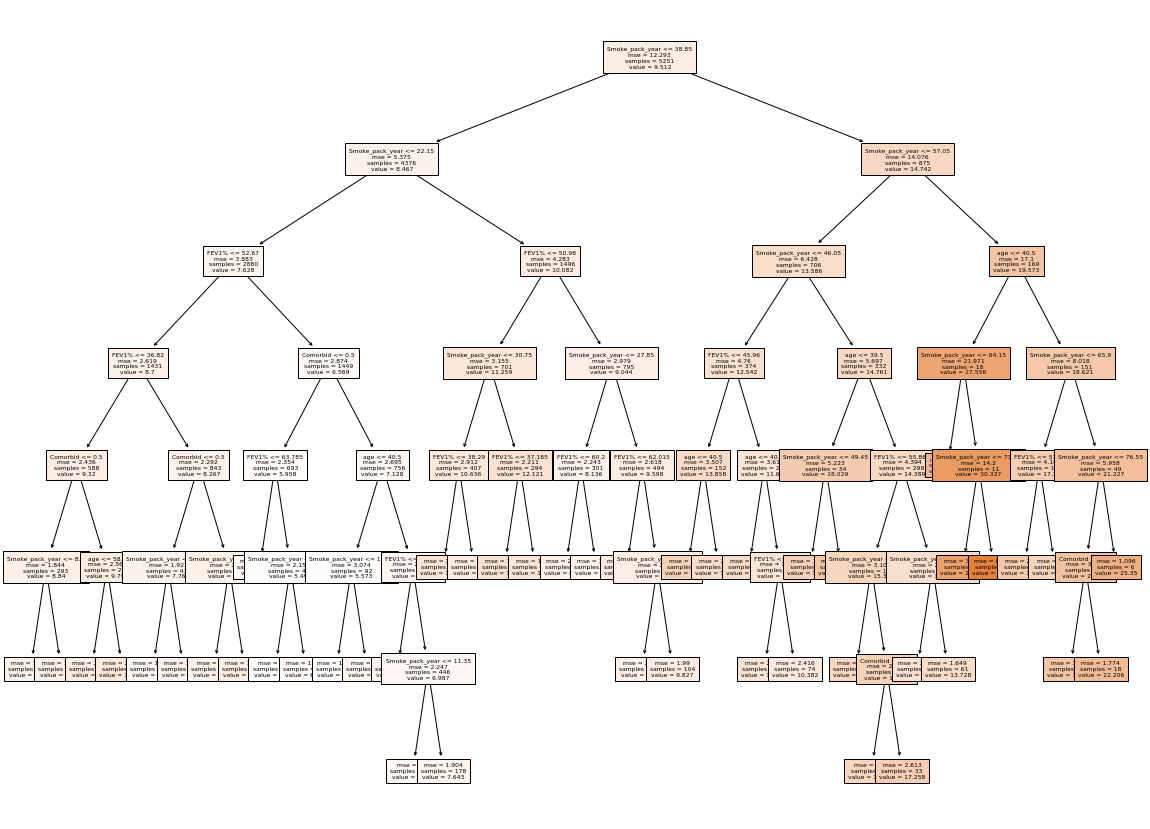

In [9]:
r_tree = DecisionTreeRegressor(ccp_alpha=0.01,random_state=0) 
r_tree.fit(X, y)
plt.figure(figsize=(20,15))
plot_tree(r_tree, feature_names=X.columns, filled=True, fontsize=6) 
plt.show()
# 예측 능력만 좋음

# 다른 회귀분석 방법과의 비교

## 데이터 구분 : 학습 데이터와 검증데이터

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

### 회귀나무 하이퍼파라미터 튜닝

In [11]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.01, 0.001),
                          'min_impurity_decrease': np.arange(0,0.01,0.001),
                          'min_samples_split': np.arange(2,402,100)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009]),
                         'min_impurity_decrease': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009]),
                         'min_samples_split': array([  2, 102, 202, 302])})

In [12]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.007, 'min_samples_split': 2}
score   : 0.7821991304485522


### Alpha=0.0, min_impurity_decrease=0.007,  min_samples_split=2  트리

In [13]:
r1_tree = DecisionTreeRegressor(ccp_alpha=0.0,min_impurity_decrease=0.007,min_samples_split=2,random_state=0)
r1_tree.fit(X_train, y_train)

DecisionTreeRegressor(min_impurity_decrease=0.007, random_state=0)

### Default 트리

In [14]:
r2_tree = DecisionTreeRegressor(random_state=0) 
r2_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### 선형 회귀분석

In [15]:
from sklearn.linear_model import LinearRegression
r_linear = LinearRegression(fit_intercept = True) # fit_intercept = True 절편이 있는 분석
r_linear.fit(X_train ,y_train) 

LinearRegression()

### 신경망분석

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
r_nn = MLPRegressor(hidden_layer_sizes=(5), random_state=0, max_iter = 1000)
r_nn.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVR

In [17]:
from sklearn.svm import SVR, SVC # R -> Regression / SCV ->  Classifier : 분류 분석용
r_svr = SVR(kernel='rbf') 
r_svr.fit(X_train_scaled, y_train)

SVR()

### 랜덤포레스트

In [18]:
from sklearn.ensemble import RandomForestRegressor
r_rf = RandomForestRegressor(random_state=0)
r_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

### 평균절대오차비율 (MAPE) 비교

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
print('Pruned Tree      :',mean_absolute_percentage_error(y_test,r1_tree.predict(X_test)))
print('Default Tree     :',mean_absolute_percentage_error(y_test,r2_tree.predict(X_test)))
print('Linear Regression:',mean_absolute_percentage_error(y_test,r_linear.predict(X_test)))
print('Neural Nerwork   :',mean_absolute_percentage_error(y_test,r_nn.predict(X_test_scaled)))
print('SV Regression    :',mean_absolute_percentage_error(y_test,r_svr.predict(X_test_scaled)))
print('Random Forest    :',mean_absolute_percentage_error(y_test,r_rf.predict(X_test)))

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Users\choi yeseul\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)